In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# All data + strains
total = 71
start = 3
end = 20
skipfooter = total-end
data_1all = pd.read_csv("./forma10a.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

start = 28
end = 45
skipfooter = total-end
data_1xx = pd.read_csv("./forma10a.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

start = 53
end = 70
skipfooter = total-end
data_1xy = pd.read_csv("./forma10a.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

In [3]:
# All data + strains
total = 152
start = 3
end = 47
skipfooter = total-end
data_2all = pd.read_csv("./forma10b.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

start = 55
end = 99
skipfooter = total-end
data_2xx = pd.read_csv("./forma10b.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

start = 107
end = 151
skipfooter = total-end
data_2xy = pd.read_csv("./forma10b.8", engine = 'python', skiprows=start-1, 
                        skipfooter=skipfooter)

In [4]:
# Plot the data
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
plt.plot(np.array(data_1all["EPXX"]), np.array(data_1all["SIXX"]), 'C0-', label='Model A')
plt.plot(np.array(data_2all["EPXX"]), np.array(data_2all["SIXX"]), 'C1-', label='Model B')
plt.xlabel('$\epsilon_{xx}$', fontsize=16)
plt.ylabel('$\sigma_{xx}$ (MPa)', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
ax = fig.add_subplot(122)
plt.plot(np.array(data_1all["EPXY"]), np.array(data_1all["SIXY"]), 'C0-', label='Model A')
plt.plot(np.array(data_2all["EPXY"]), np.array(data_2all["SIXY"]), 'C1-', label='Model B')
plt.xlabel('$\epsilon_{xy}$', fontsize=16)
plt.ylabel('$\sigma_{xy}$ (MPa)', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
fig.savefig('forma10_8_sigeps.svg')

In [4]:
# Plot the strain-time data
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
plt.plot(np.array(data_1xx["INST"]), np.array(data_1xx["EPXX_0"]), 'C0o-', label='Model A')
plt.plot(np.array(data_2xx["INST"]), np.array(data_2xx["EPXX_0"]), 'C1x-', label='Model B')
plt.ylabel('$\epsilon_{xx}$', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
ax = fig.add_subplot(122)
plt.plot(np.array(data_1xy["INST"]), np.array(data_1xy["EPXY_0"]), 'C0o-', label='Model A')
plt.plot(np.array(data_2xy["INST"]), np.array(data_2xy["EPXY_0"]), 'C1x-', label='Model B')
plt.ylabel('$\epsilon_{xy}$', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
fig.savefig('forma10_8_epstime.svg')

In [6]:
def calcPQ(sig_data, tau_data):
    p = list(map(lambda x: x / 3.0, sig_data))
    q = list(map(lambda x, y: np.sqrt(x**2 + 3 * y**2), sig_data, tau_data))
    return p, q

In [7]:
p1, q1 = calcPQ(data_1all["SIXX"], data_1all["SIXY"])
p2, q2 = calcPQ(data_2all["SIXX"], data_2all["SIXY"])

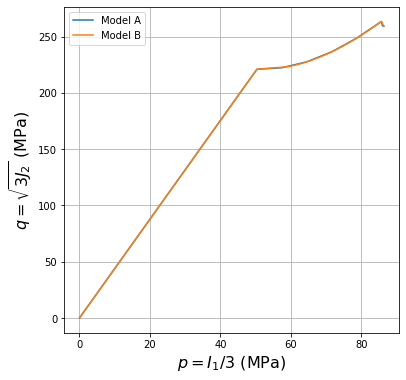

In [8]:
# Plot the data
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.plot(np.array(p1), np.array(q1), 'C0-', label='Model A')
plt.plot(np.array(p2), np.array(q2), 'C1-', label='Model B')
plt.xlabel('$p = I_1/3$ (MPa)', fontsize=16)
plt.ylabel('$q = \sqrt{3J_2}$ (MPa)', fontsize=16)
plt.grid(True)
#ax.set_ylim([0, 20])
ax.legend(loc='best', fontsize=10)
fig.savefig('forma10_pq.svg')